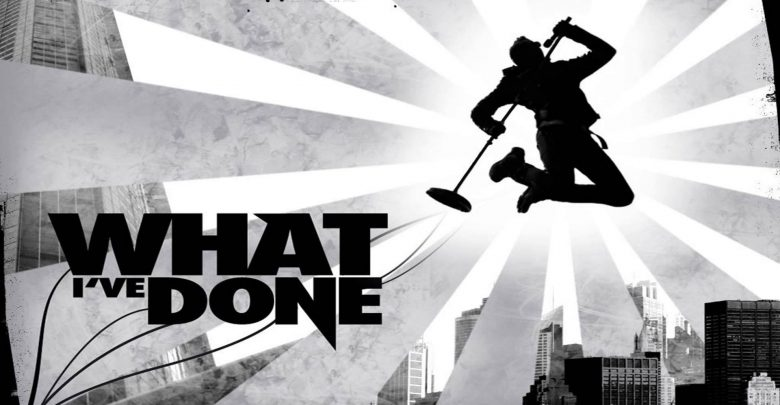
# Things have been done in this revised c++ code.
## 1. Do the numerical calculation in the momentum space instead of energy space.
Calculating the dynamics in momentum space is not as efficient as in energy space as long as the dimensionality of the problem is larger than one ($\mathcal{O}(N^d)$ v.s. $\mathcal{O}(N)$). However, in momentum space, it is easier to incorporate the impact of polarizations of the laser field on different electronic states.

Laser fields with different polarizations will affect the Fermi surface differently. For example, for a square lattice with dispersion: $\epsilon_\boldsymbol{k} = -2J\left(\cos(k_x)+\cos(k_y)\right)-\mu$, the Fermi surface looks like figure A:

|(A)|(B)|(C)|
|:----:|:----:|:----:|
|![FS1.png](Graphs/FS1.png)|![FS2.png](Graphs/FS2.png)|![FS3.png](Graphs/FS3.png)|

where the brown solid line is the Fermi surface $\epsilon_\boldsymbol{k} = 0$ with $\mu=-1.18992$, the two dashed lines show the energy cutoff above and below the Fermi surface $-\Omega_\text{Debye} < \epsilon_\boldsymbol{k} < \Omega_\text{Debye}$.
Now turn on the laser field $\boldsymbol{A}$. The Fermi surface, therefore, deforms into figure (B) and (C) for $45$ degree and $0$ degree respectively.

For the special case of $45$ degree polarization, the entire Fermi surface shrinks (the new Fermi surface under laser field is shown as the solid blue line). In other words, the energy of each $\boldsymbol{k}$ state is increased, to the leading order, by $\sim A^2$. Using the fact that $S_{\boldsymbol{k}}^x$ and $S_{\boldsymbol{k}}^z$ are even in $\epsilon$ while $S_{\boldsymbol{k}}^y$ is odd, from the equations of motion, one can conclude that for 45 degree polarization, when the laser is on, the $y$-component of the effective magnetic field becomes larger than zero. Therefore, the pseudospins will rotate towards the directions leading to a larger superconducting gap. In the previous code, the size of the imaginary part of the gap was wrong. Consequently, the pseudospins were rotating towards the oppsite direction, which miraculously make the wrong results resonable. Ironically, now the code is right, but the results for 45 degree polarization are not reasonable. I ran into this problem before using my old python code. I then used a imaginary gauge fied based on $\boldsymbol{A}\sim \frac{i}{\omega} \boldsymbol{E}$. This led to an oppsite sign for the $A^2$ term and consequently a decreasing gap.

It seems to me that Foster *et al* also realized the weired behavior of 45 degree polarization but they were hiding them in the paper. They simply mention the 45 degree results in the caption of Fig.3, saying "*for α = π/4* (45 degree polarization) *, we did not observe phase-I* (gapless regime) *dynamics. To determine whether the latter is possible, it would be necessary to retain higher-order terms O(˜A4)in Eqs.(10) and (11).*" Based on my previous reasoning, it is not possible to go the gapless phase for 45 degree polarization pump. It is not necessary for us to dig deeper into this issue in our semi-phenomelogical paper. However, it probably need to be studied more carefully for those who wants to use such Peierls substitution to model the coupling between laser field and superconductor seriously.

The issue for 45 degree polarization is not present in 0 degree polarization. As shown in figure (C), under the laser field, some electrons increase energy, others decrease. Summing over all states within the energy window seted by the Debye freqency, we arrived at a negative $y$-component of the effective magnetic field. Consequently, the superconducting gap decreases.

The symmetry of the square lattice allows us to do the calculation in one quarter of the Brillouin zone. To further increase the computational efficiency, we only focus on the momentum states near the Fermi surface. The momentum grid we used are shown below. The covered range of the grid depends on the energy cutoff $\Omega_\text{Debye}$ and the amplitude of the laser field $A_0$. 


In [1]:
import numpy as np
from matplotlib.pyplot import *

In [62]:
kstates=np.loadtxt('Output/Data-Momentum_states.dat');

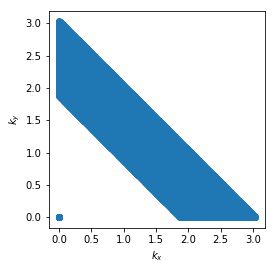

In [64]:
kgrid = [(kstates[i][1], kstates[i][2]) for i in range(len(kstates))]
kx, ky = (zip(*kgrid))
fig = figure()
ax = fig.add_subplot(111)
ax.scatter(kx,ky);
ax.set_aspect(aspect=1)
xlabel('$k_x$')
ylabel('$k_y$')
show()

### *1/4 of the Brillouin Zone v.s. Full Brillouin Zone*

The symmetry allows us to only consider 1/4 of the Brillouin Zone is the parity symmetry in the k-space $\epsilon_{k_x, k_y} = \epsilon_{\pm k_x, \pm k_y}$. In other words, the entire Brollouin Zone is simply 4 copies of the quarter Brollouin zone, which is independent on whether tetragonal symmetry is preserved or not, see Figure (A), (B) and (C).

In the following, I show two simulations using the full Brillouin Zone and 1/4 of the Brillouin Zone, respectively. Specificly, for the full Brillouin Zone, I used a momentum grid goes from $-\pi$ to $\pi$ with a step size of $2\pi/(N-1)$, where $N^2$ is the total number of sampling points on the grid. For the 1/4 Brillouin Zone, the momentum grid goes from $0$ to $\pi$ with a step size of $\pi /(N-1)$. To make quantitative comparision, we have to make the step size the same for two different momentum grids. So, we choose $N=401$ for the full Brillouin Zone, and $N=201$ for the quarter Brillouin zone. The results are shown below. Note the relatively large oscillations after the pump due to the coarse momentum grid we used.

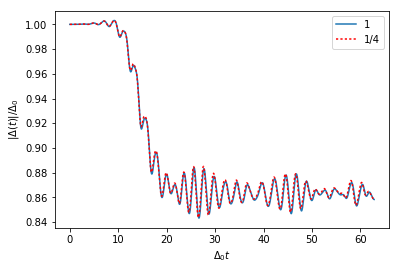

In [59]:
full = np.loadtxt('Output/test_fullBZ-N=401-Ax=0.75-Ay=0-omega_p_0.120865-tau_31.415927-sigma_6.283185-T1_0-T2_0.dat');
quarter = np.loadtxt('Output/test_quarterBZ-N=201-Ax=0.75-Ay=0-omega_p_0.120865-tau_31.415927-sigma_6.283185-T1_0-T2_0.dat');
t1, D1 = (zip(*full))
t2, D2 = (zip(*quarter))
plot(t1, D1, label='1')
plot(t2, D2, 'r:', label='1/4')
xlabel('$\Delta_{0}t$')
ylabel('$|\Delta(t)| / \Delta_0$')
legend()
show()


## 2. Thermalized superconducting gap is now a complex number.

Previously, we chose the thermalized gap to be real. This is not necessary the case, since the thermalized gap is calculated from energy conservation which does not depend on the phase of the gap at all.

To incorporate this change, we define the thermalized pseudospin configuration to be $\hat{\boldsymbol{s}}_{\parallel,\boldsymbol{k}}^{*}=\left(\frac{\Delta_*^{'}}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}, \frac{-\Delta_{*}^{''}}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}, \frac{-\epsilon_{\boldsymbol{k}}}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}\right)$

$\hat{\boldsymbol{s}}_{\perp,\boldsymbol{k}}^{*,1} = \left(\frac{\Delta^{''}}{\left|\Delta\right|}, \frac{\Delta^{'}}{\left|\Delta\right|}, 0\right)$

$\hat{\boldsymbol{s}}_{\perp,\boldsymbol{k}}^{*,2} = \left(\frac{\epsilon_{\boldsymbol{k}}}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}\frac{\Delta^{'}}{\left|\Delta\right|}, \frac{-\epsilon_{\boldsymbol{k}}}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}\frac{\Delta^{''}}{\left|\Delta\right|}, \frac{\Delta_*}{\sqrt{\epsilon_{\boldsymbol{k}}^{2}+\left|\Delta_{*}\right|^{2}}}\right)$

where the phase of the thermalized gap $\Delta_*=\left|\Delta_*\right|e^{i\phi}$ is determined by the time evolution $e^{i\phi}=\frac{\Delta(t)}{\left|\Delta(t)\right|}$.



## 3. Comparasion with Forster's results
In Foster's paper, for 0 degree polarization, they managed to get the gapless regime (called phase I in their paper) for $A^2 > 5\Delta_0$ and the phase boundary only weakly depends on $\Delta_0/J$ (see figure Foster 2).

Foster 1 | Foster 2
:---:|:---:
![Foster_1.png](Graphs/Foster_1.png)|![Foster2.png](Graphs/Foster2.png)

In my simulation, the phase boundary is smaller than $A^2\approx 5 \Delta_0$.

In [67]:
data_short_1 = np.loadtxt('Output/Data(t)-Ax=1.5-Ay=0-omega_p=0.-tau=5.-sigma=1.-T1=0-T2=0-L_kxy=400-L_kx=400.dat');
data_short_2 = np.loadtxt('Output/Data(t)-Ax=3-Ay=0-omega_p=0.-tau=6.283185-sigma=0.785398-T1=0-T2=0-L_kxy=400-L_kx=400.dat');

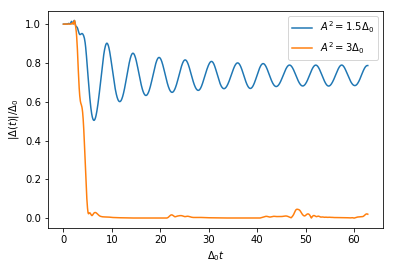

In [99]:
D_t_s1=[(data_short_1[i][0], data_short_1[i][1]) for i in range(len(data_short_1))]
D_t_s2=[(data_short_2[i][0], data_short_2[i][1]) for i in range(len(data_short_2))]
t, D1 = (zip(*D_t_s1))
t, D2 = (zip(*D_t_s2))
plot(t, D1, label='1')
plot(t, D2, label='2')
legend(['$A^2=1.5\Delta_0$','$A^2=3\Delta_0$'])
xlabel('$\Delta_{0}t$')
ylabel('$|\Delta(t)| / \Delta_0$')
show()

As shown above, the gap exponentially decay to zero for $A^2=3\Delta_0$ already. In Foster's paper, however, the dynamics is still in the oscillation regime for the same amplitude of the laser field $A^2=3\Delta_0$. So, the laser field has a weaker effect in Foster's paper. Foster's results seem to be universal, as in figure Foster 2 where they show similar results for different $\Delta_0/J$, although $\Delta_0/J$ depends on many other parameters of the system, e.g. el-el-interaction $V_0$, energy cutoff $\Omega_\text{Debye}$ and chemical potential $\mu$. I also never understand why Foster *et al* want to compare $\Delta_0$ with $J$. To me, $J$ is the least relavent energy scale to superconductivity. Moreover, $\Delta_0/J$ contains very little information about the system they work with ($\Delta_0/\Omega_\text{Debye}$ is much more useful). They have to specify either the Debye frequency or the coupling contant they used, so that others can reproduce their results and make quantitative comparision. However, they provide neither. 

Later, I found that how efficient for the laser field to drive the dynamics depends on the chemical potential. Previous simulations are for $\mu/J = -1.18992$. Then I ran the code for different chemical potentials and found for $\mu/J = -2.65$, the results are similar to Foster's.


In [101]:
data_short_265_1 = np.loadtxt('Output/Data(t)-Ax=3-Ay=0-omega_p=0.-tau=6.283185-sigma=0.785398-T1=0-T2=0-L_kxy=400-L_kx=400_mu=-2.65.dat');
data_short_265_2 = np.loadtxt('Output/Data(t)-Ax=5.5-Ay=0-omega_p=0.-tau=6.283185-sigma=0.785398-T1=0-T2=0-L_kxy=400-L_kx=400_mu=-2.65.dat');

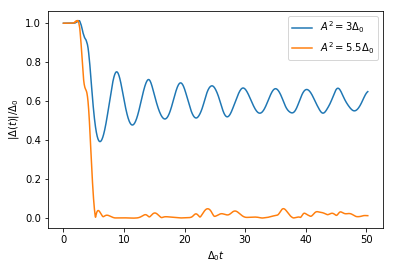

In [102]:
D_t_s_265_1=[(data_short_265_1[i][0], data_short_265_1[i][1]) for i in range(len(data_short_265_1))]
D_t_s_265_2=[(data_short_265_2[i][0], data_short_265_2[i][1]) for i in range(len(data_short_265_2))]
t, D1 = (zip(*D_t_s_265_1))
t, D2 = (zip(*D_t_s_265_2))
plot(t, D1, label='1')
plot(t, D2, label='2')
legend(['$A^2=3\Delta_0$','$A^2=5.5\Delta_0$'])
xlabel('$\Delta_{0}t$')
ylabel('$|\Delta(t)| / \Delta_0$')
show()

## 4. Reproduce the results for our manuscript

The laser field we used has the following form: $\boldsymbol{A} = \hat{x}A_0\exp\left[-\frac{(t-\tau/2)^2}{2\sigma^2}\right]\cos\left(\omega_\text{pump}t\right)$.

### Figure 3 of the manuscript:
For the short pulse, the parameters we used are: $\tau = 5/\Delta_0$, $\sigma = \tau/5$, $\omega_\text{pump}=0$, and $A_0^2=1.5\Delta_0$.

The new results:

![Figure3_v4.png](Graphs/Figure3_v4.png)

### Figure 1 (D) of the manuscript:
For the longer pulse, the parameters we used are $\tau = 10 \pi/\Delta_0$, $\sigma = \tau/5$, $\omega_\text{pump}=1.4\Delta_0$, and $A_0^2=0.75\Delta_0$. For this new c++ code, the results I get are qualitatively the same but quantitative different.

In [3]:
data_long_A075_Damped = np.loadtxt('Output/Data(t)-Ax=0.75-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=558.478729-T2=260.623407-L_kxy=400-L_kx=400.dat');
data_long_A075_Free = np.loadtxt('Output/Data(t)-Ax=0.75-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=0-T2=0-L_kxy=400-L_kx=400.dat');

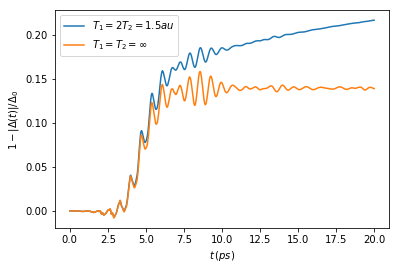

In [45]:
D075_dam=[(data_long_A075_Damped[i][0]/3.14, 1-data_long_A075_Damped[i][1]) for i in range(len(data_long_A075_Damped))]
D075_fre=[(data_long_A075_Free[i][0]/3.14, 1-data_long_A075_Free[i][1]) for i in range(len(data_long_A075_Free))]
t, D1 = (zip(*D075_dam))
t, D2 = (zip(*D075_fre))
plot(t, D1, label='1')
plot(t, D2, label='2')
legend(['$T_1=2T_2=1.5\tau$', '$T_1=T_2=\infty$'])
xlabel('$t \, (ps)$')
ylabel('$1-|\Delta(t)| / \Delta_0$')
show()

Comparing with the old version, there is a quantitative diffence.
![Figure1D_old.png](Graphs/Figure1D_old.png)

To further decrease the gap after the pump, I increase the amplitude of the laser field and choose slightly shorter $T_{1,2}$ ($T_1=2T_2=1.2\tau$) to compensate the larger oscillation due to a larger $A_0$.

Parameter I choose: $A_0^2=1\Delta_0$, other parameters are the same as before: $\tau = 10 \pi/\Delta_0$, $\sigma = \tau/5$, $\omega_\text{pump}=1.4\Delta_0$.

In [83]:
data_long_A1_Damped = np.loadtxt('Output/Data(t)-Ax=1-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=446.782983-T2=223.391491-L_kxy=400-L_kx=400.dat');
data_long_A1_Free = np.loadtxt('Output/Data(t)-Ax=1-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=0-T2=0-L_kxy=400-L_kx=400.dat');

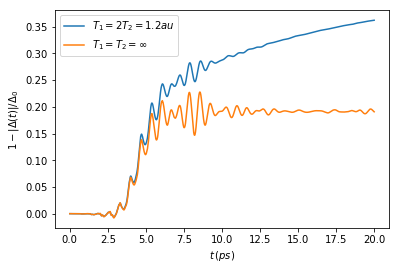

In [84]:
D1_dam=[(data_long_A1_Damped[i][0]/3.14, 1-data_long_A1_Damped[i][1]) for i in range(len(data_long_A1_Damped))]
D1_fre=[(data_long_A1_Free[i][0]/3.14, 1-data_long_A1_Free[i][1]) for i in range(len(data_long_A1_Free))]
t, D1 = (zip(*D1_dam))
t, D2 = (zip(*D1_fre))
plot(t, D1, label='1')
plot(t, D2, label='2')
legend(['$T_1=2T_2=1.2\tau$', '$T_1=T_2=\infty$'])
xlabel('$t\,(ps)$')
ylabel('$1-|\Delta(t)| / \Delta_0$')
show()

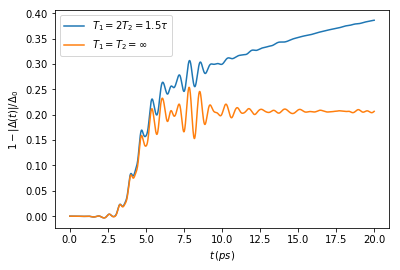

In [112]:
data_long_A11_Damped = np.loadtxt('Output/Data(t)-Ax=1.1-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=558.478729-T2=279.239364-L_kxy=400-L_kx=400.dat');
data_long_A11_Free = np.loadtxt('Output/Data(t)2-Ax=1.1-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=0-T2=0-L_kxy=400-L_kx=400.dat');
D11_dam=[(data_long_A11_Damped[i][0]/3.14, 1-data_long_A11_Damped[i][1]) for i in range(len(data_long_A11_Damped))]
D11_fre=[(data_long_A11_Free[i][0]/3.14, 1-data_long_A11_Free[i][1]) for i in range(len(data_long_A11_Free))]
t1, D1 = (zip(*D11_dam))
t2, D2 = (zip(*D11_fre))
plot(t1, D1, label='1')
plot(t2, D2, label='2')
legend([r'$T_1=2T_2=1.5\tau$', '$T_1=T_2=\infty$'])
xlabel('$t\,(ps)$')
ylabel('$1-|\Delta(t)| / \Delta_0$')
show()

### Figure 2 (A):

Corresponding energy evolution 

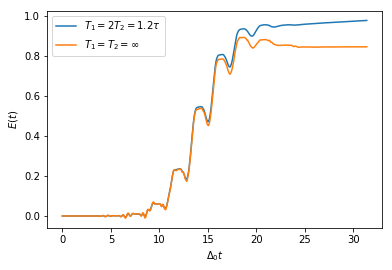

In [111]:
E1_dam=[(data_long_A1_Damped[i][0], data_long_A1_Damped[i][2]/0.135133) for i in range(3000)]
E1_fre=[(data_long_A1_Free[i][0], data_long_A1_Free[i][2]/0.135133) for i in range(3000)]
t1, E1 = (zip(*E1_dam))
t2, E2 = (zip(*E1_fre))
plot(t1, E1, label='1')
plot(t2, E2, label='2')
legend([r'$T_1=2T_2=1.2\tau$', '$T_1=T_2=\infty$'])
xlabel('$\Delta_{0}t$')
ylabel('$E(t)$')
show()

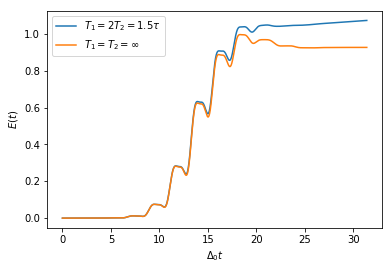

In [110]:
E11_dam=[(data_long_A11_Damped[i][0], data_long_A11_Damped[i][2]/0.135133) for i in range(2000)]
E11_fre=[(data_long_A11_Free[i][0], data_long_A11_Free[i][2]/0.135133) for i in range(2000)]
t1, E1 = (zip(*E11_dam))
t2, E2 = (zip(*E11_fre))
plot(t1, E1, label='1')
plot(t2, E2, label='2')
legend([r'$T_1=2T_2=1.5\tau$', '$T_1=T_2=\infty$'])
xlabel('$\Delta_{0}t$')
ylabel('$E(t)$')
show()

### Figure 2 (B): final effective temperature as a function of pump amplitude

$T_f / T_c$ v.s. $A_0^2/\Delta_0$

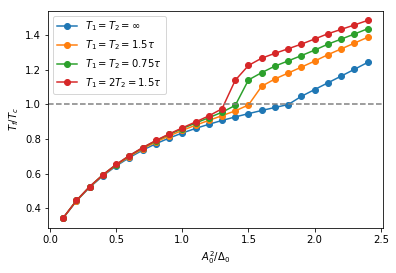

In [137]:
T_A_free = np.loadtxt('Output/T_A_free.dat');
T_A_15 = np.loadtxt('Output/T_A_1.5.dat');
T_A_075 = np.loadtxt('Output/T_A_0.75.dat');
T_A_15_075 = np.loadtxt('Output/T_A_1.5_0.75.dat');
A1, T1 = zip(*[(T_A_free[i][0]**2/0.084379, T_A_free[i][1]) for i in range(len(T_A_free))])
A2, T2 = zip(*[(T_A_15[i][0]**2/0.084379, T_A_15[i][1]) for i in range(len(T_A_15))])
A3, T3 = zip(*[(T_A_075[i][0]**2/0.084379, T_A_075[i][1]) for i in range(len(T_A_075))])
A4, T4 = zip(*[(T_A_15_075[i][0]**2/0.084379, T_A_15_075[i][1]) for i in range(len(T_A_15_075))])
plot(A1, T1, '-o', label = r'$T_1=T_2=\infty$')
plot(A2, T2, '-o', label = r'$T_1=T_2=1.5\tau$')
plot(A3, T3, '-o', label = r'$T_1=T_2=0.75\tau$')
plot(A4, T4, '-o', label = r'$T_1=2T_2=1.5\tau$')
legend()
axhline(y=1, color = 'grey', linestyle = 'dashed')
xlabel('$A_0^2/\Delta_0$')
ylabel('$T_f / T_c$')
show()

## 5. Pump width dependence of the gap oscillation

Gap oscillations were simulated for four different pump width: $\sigma = \tau/5$, $\tau / 3$ and $\tau / 2$, where $\tau = 10\pi / \Delta_0$, while keeping $A_0^2\sigma = 1.2\pi$. Consequently, $A_0^2/\Delta_0 = 0.6$, $0.36$, and $0.24$, respectively. The pulse shapes are shown below.

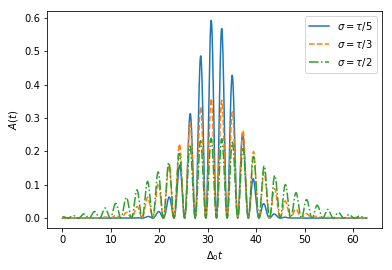

In [53]:
def pump_square(t, n):
    tau = 10 * np.pi
    sigma = tau / n
    A0 = np.sqrt(0.6 * n / 5.)
    center = tau
    omega = 0.120865/0.084379
    return (A0 * np.exp(-(t - center)**2/(2*sigma*sigma)) * np.cos(omega*t))**2
t=np.linspace(0,20*np.pi,1000)
plot(t, [pump_square(x,5) for x in t], '-', label=r'$\sigma = \tau/5$')
plot(t, [pump_square(x,3) for x in t], '--', label=r'$\sigma = \tau/3$')
plot(t, [pump_square(x,2) for x in t], '-.', label=r'$\sigma = \tau/2$')
legend()
xlabel('$\Delta_0 t$')
ylabel('$A(t)$')
show()

In [50]:
width1 = np.loadtxt('Output/Data(t)_len-Ax=0.6-Ay=0-omega_p=0.120865-tau=31.415927-sigma=6.283185-T1=0-T2=0-L_kxy=400-L_kx=400.dat');
width2 = np.loadtxt('Output/Data(t)_len-Ax=0.36-Ay=0-omega_p=0.120865-tau=31.415927-sigma=10.471976-T1=0-T2=0-L_kxy=400-L_kx=400.dat');
width3 = np.loadtxt('Output/Data(t)_len-Ax=0.24-Ay=0-omega_p=0.120865-tau=31.415927-sigma=15.707963-T1=0-T2=0-L_kxy=400-L_kx=400.dat');

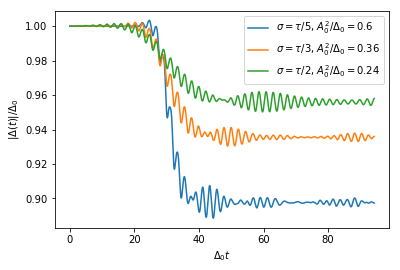

In [51]:
len1 = [(width1[i][0], width1[i][1]) for i in range(len(width1))]
len2 = [(width2[i][0], width2[i][1]) for i in range(len(width2))]
len3 = [(width3[i][0], width3[i][1]) for i in range(len(width3))]
t1, D1 = (zip(*len1))
t2, D2 = (zip(*len2))
t3, D3 = (zip(*len3))
plot(t1, D1, label=r'$\sigma = \tau/5$, $A_0^2/\Delta_0 = 0.6$')
plot(t2, D2, label=r'$\sigma = \tau/3$, $A_0^2/\Delta_0 = 0.36$')
plot(t3, D3, label=r'$\sigma = \tau/2$, $A_0^2/\Delta_0 = 0.24$')
legend()
xlabel('$\Delta_0 t$')
ylabel('$|\Delta(t)| / \Delta_0$')
show()